## Q1. (35%) Taiwan did a great job in preventing local transmission of COVID-19 particularly for the first year after the outbreak of the COVID-19. However, due to a series of unfortunate events, local infections outbroke in May 2020. 

## In the attached file _Covid19_TW.csv_, you can find the records for the number of infected from 2021/05/15 to 2021/06/13 for Taipei and for the entire Taiwan. 

## Your task is to analyse these records and to check if:

### (1) the ‘soft’ lockdown introduced on 2021/05/15 and 2021/05/19, respectively, by the Taipei City and Taiwan CDC really worked. More specifically, considering the 14-day incubation period of COVID-19, we want to compare if there is a 'statistically significant' decrease in the average number of infections before and after the 14-day incubation period (i.e., the potential effective date starting on 2021/05/29 and 2021/06/02 in Taipei and entire Taiwan, respectively). 

### (2) there was a time lag between the number of infections in Taipei and that in the rest of Taiwan (excluding Taipei) because of the difference as soft lockdown was applied between Taipei and the rest of Taiwan. This can be done by computing correlation coefficient between two time series with a lag.

### 1.0. Import essential modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import pearsonr

### 1.1. (5%) Import records from the attached _Covid19_TW.csv_ file and conduct a visual inspection by plotting a line chart illustrating the number of infections for Taipei and Taiwan over the period of 2021/05/15 – 2021/06/13. 

#### Note for the plot:
* The size of the plot is 10-inch width and 4-inch height.
* The x-axis is for date and the y-axis for for the number of infections, respectively. 
* The line for the number of infections in Taipei is plotted with blue solid line, and the name of the line is 'Taipei'.
* The line for the number of infections in entire Taiwan is plotted with grey solid line, and the name of the line is 'Taiwan'.
* The text labels for x-axis ('date') and y-axis ('# of infections') for the plot
* legend is required.
* The plot title shall be ('Taiwan COVID-19 analysis'). 


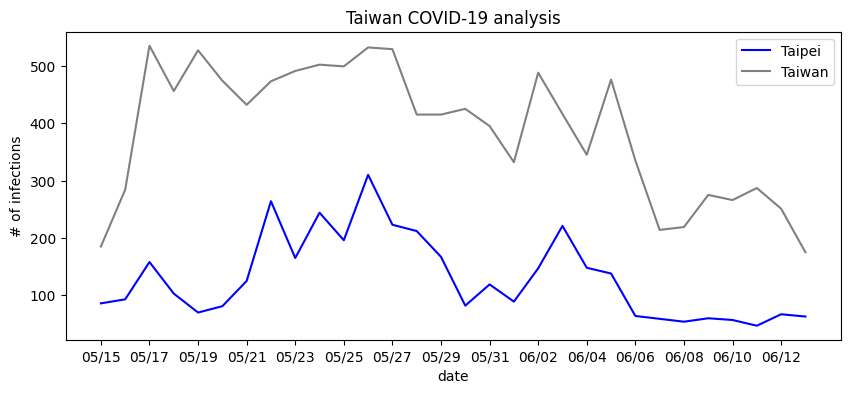

In [2]:
path='Data/Covid19_TW.csv'
df = pd.read_csv(path)

plt.figure(figsize=(10, 4))
plt.plot(df['date'].str[5:], df['Taipei_Infected'], color='blue', label='Taipei')
plt.plot(df['date'].str[5:], df['Taiwan_Infected'], color='grey', label='Taiwan')
plt.title('Taiwan COVID-19 analysis')
plt.xlabel('date')
plt.ylabel('# of infections')
plt.xticks(range(0, len(df['date']), 2), df['date'].str[5:].iloc[::2])
plt.legend()
plt.show()

### 1.2. (10%) Perform Statistical Test over the mean values of the number of the infections before and after the soft lockdown was effective in Taipei and Taiwan, respectively, with the following scenario (one-sided test with α=0.01) and output the test result and make a conclusion based on the test result:

#### Scenario 5 (symmetric case): $\mu_A$ is not known; $\mu_B$ is not known; $\sigma_B$ is not known; $\sigma_A$ is not known

#### Note for the comparing periods:
* For Taipei: 2021/05/15-2021/05/28 (before lockdown was effective), and 2021/05/29-2021/06/13 (after lockdown was effective)
* For Taiwan: 2021/05/15-2021/06/01 (before lockdown was effective), and 2021/06/02-2021/06/13 (after lockdown was effective)

#### Note for the output: it shall follow the format below (to 4 decimal places)
--------- Taipei ---------</br>
test statistic T = XXXX </br>
t_alpha = YYYY </br>
p-value = ZZZZ </br>
Reject or accept H0: Reject/Accept? </br>
--------- Taiwan ---------</br>
test statistic T = XXXX </br>
t_alpha = YYYY </br>
p-value = ZZZZ </br>
Reject or accept H0: Reject/Accept? </br>

In [3]:
alpha = 0.01

print('--------- Taipei ---------')
be_taipei = df['Taipei_Infected'][:14]
af_taipei = df['Taipei_Infected'][14:]

S_be_taipei = np.std(be_taipei, ddof=1)*np.std(be_taipei, ddof=1)/len(be_taipei)
S_af_taipei = np.std(af_taipei, ddof=1)*np.std(af_taipei, ddof=1)/len(af_taipei)

R_taipei = np.abs((np.mean(be_taipei) - np.mean(af_taipei)))/np.sqrt(S_be_taipei + S_af_taipei)
nu_taipei = (S_be_taipei + S_af_taipei)**2 / (S_be_taipei*S_be_taipei/(len(be_taipei)-1) + S_af_taipei*S_af_taipei/(len(af_taipei)-1))
t_alpha_taipei = stats.t.ppf(1-alpha,nu_taipei)
print(f'test statistic T = {R_taipei:.4f}')
print(f't_alpha = {t_alpha_taipei:.4f}')

p_value_taipei = 1-stats.t.cdf(R_taipei,nu_taipei)
print(f'p-value = {p_value_taipei:.4f}')

if R_taipei > t_alpha_taipei:
    print(f'Reject or accept H0: Reject')
else:
    print(f'Reject or accept H0: Accept')

print('--------- Taiwan ---------')
be_taiwan = df['Taiwan_Infected'][:18]
af_taiwan = df['Taiwan_Infected'][18:]

S_be_taiwan = np.std(be_taiwan, ddof=1)*np.std(be_taiwan, ddof=1)/len(be_taiwan)
S_af_taiwan = np.std(af_taiwan, ddof=1)*np.std(af_taiwan, ddof=1)/len(af_taiwan)

R_taiwan = np.abs((np.mean(be_taiwan) - np.mean(af_taiwan)))/np.sqrt(S_be_taiwan + S_af_taiwan)
nu_taiwan = (S_be_taiwan + S_af_taiwan)**2 / (S_be_taiwan*S_be_taiwan/(len(be_taiwan)-1) + S_af_taiwan*S_af_taiwan/(len(af_taiwan)-1))
t_alpha_taiwan = stats.t.ppf(1-alpha,nu_taiwan)
print(f'test statistic T = {R_taiwan:.4f}')
print(f't_alpha = {t_alpha_taiwan:.4f}')

p_value_taiwan = 1-stats.t.cdf(R_taiwan,nu_taiwan)
print(f'p-value = {p_value_taiwan:.4f}')

if R_taiwan > t_alpha_taiwan:
    print(f'Reject or accept H0: Reject')
else:
    print(f'Reject or accept H0: Accept')

--------- Taipei ---------
test statistic T = 2.7905
t_alpha = 2.5062
p-value = 0.0053
Reject or accept H0: Reject
--------- Taiwan ---------
test statistic T = 3.4323
t_alpha = 2.5059
p-value = 0.0012
Reject or accept H0: Reject


#### Make your conclusion here: 

The 'soft' lockdown caused a 'statistically significant' decrease in the average number of infections, both in 'Taipei_Infected' and 'Taiwan_Infected'.

### 1.3. (20%) In addition to the mean test, we would like to see if there is a time lag between the number of infections in Taipei and that in the _rest_ of Taiwan (excluding Taipei) because of the difference in time as soft lockdown was applied between Taipei and the rest of Taiwan. This can be done by computing correlation coefficient between two time series with a lag.

### This can be done by using the series of number of infections in Taipei as reference, and, with a given time lag k, compute the Pearson correlation coefficient ($\rho_{k}$) between the total number of infections in the rest of Taiwan and that in Taipei ($-6 \leq k \leq 6 $). The $k$ resulting in the _maximum_ correlation coefficient represents the lag. 

### Please output the $k$ you obtain, the corresponding correlation coefficient and the confidence intervals (two-sided, $\alpha=0.05$) for the estimate of this correlation coefficient.  

#### Note for the output: it shall follow the format below (to 4 decimal places):
The maximum correlation coefficent is XXXX at lag k </br>
The confidence interval is [YYYY,ZZZZ]


In [4]:
df['Other_Infected'] = df['Taiwan_Infected']-df['Taipei_Infected']
num_day = len(df['Taiwan_Infected'])

correlation_list = []

for i in range(6,0,-1):
    correlation_coefficient, p_value = pearsonr(df['Taipei_Infected'][i:], df['Other_Infected'][:num_day-i])
    correlation_list.append(correlation_coefficient)

for i in range(0,7):
    correlation_coefficient, p_value = pearsonr(df['Taipei_Infected'][:num_day-i], df['Other_Infected'][i:])
    correlation_list.append(correlation_coefficient)

max_correlation = max(correlation_list)
max_index = correlation_list.index(max_correlation)
max_lag_k = -6 + max_index
print(f'The maximum correlation coefficent is {max_correlation:.4f} at lag {max_lag_k}, 台灣延遲台北-5天 (台灣提早台北5天)')

sample_num = df['Taipei_Infected'][5:].count()
z = 0.5 * np.log((1+max_correlation)/(1-max_correlation))
standard_deviation = np.sqrt(1/(sample_num-3))
upper_limit = z + standard_deviation*1.96
lower_limit = z - standard_deviation*1.96
upper_r = (np.exp(2*upper_limit)-1) / (np.exp(2*upper_limit)+1)
lower_r = (np.exp(2*lower_limit)-1) / (np.exp(2*lower_limit)+1)
print(f"The confidence interval for correlation is: [{lower_r:.4f}, {upper_r:.4f}]")

The maximum correlation coefficent is 0.4669 at lag -5, 台灣延遲台北-5天 (台灣提早台北5天)
The confidence interval for correlation is: [0.0881, 0.7278]
